In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [3]:
df = pd.read_csv("breast.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
NAN = df.isna().sum().sum()
row = df.shape[0]
col = df.shape[1]
print(f'the amount of rows:{row}, the amount of columns:{col}')
print(f'amount of NAN values:{NAN}')

the amount of rows:569, the amount of columns:32
amount of NAN values:0


In [5]:
# filter the two diagnosis for plotting later
B_df_col = df.loc[df["diagnosis"] == "B"]
M_df_col = df.loc[df["diagnosis"] == "M"]

B_df_col = B_df_col.drop(columns=["diagnosis","id"])
M_df_col = M_df_col.drop(columns=["diagnosis","id"])

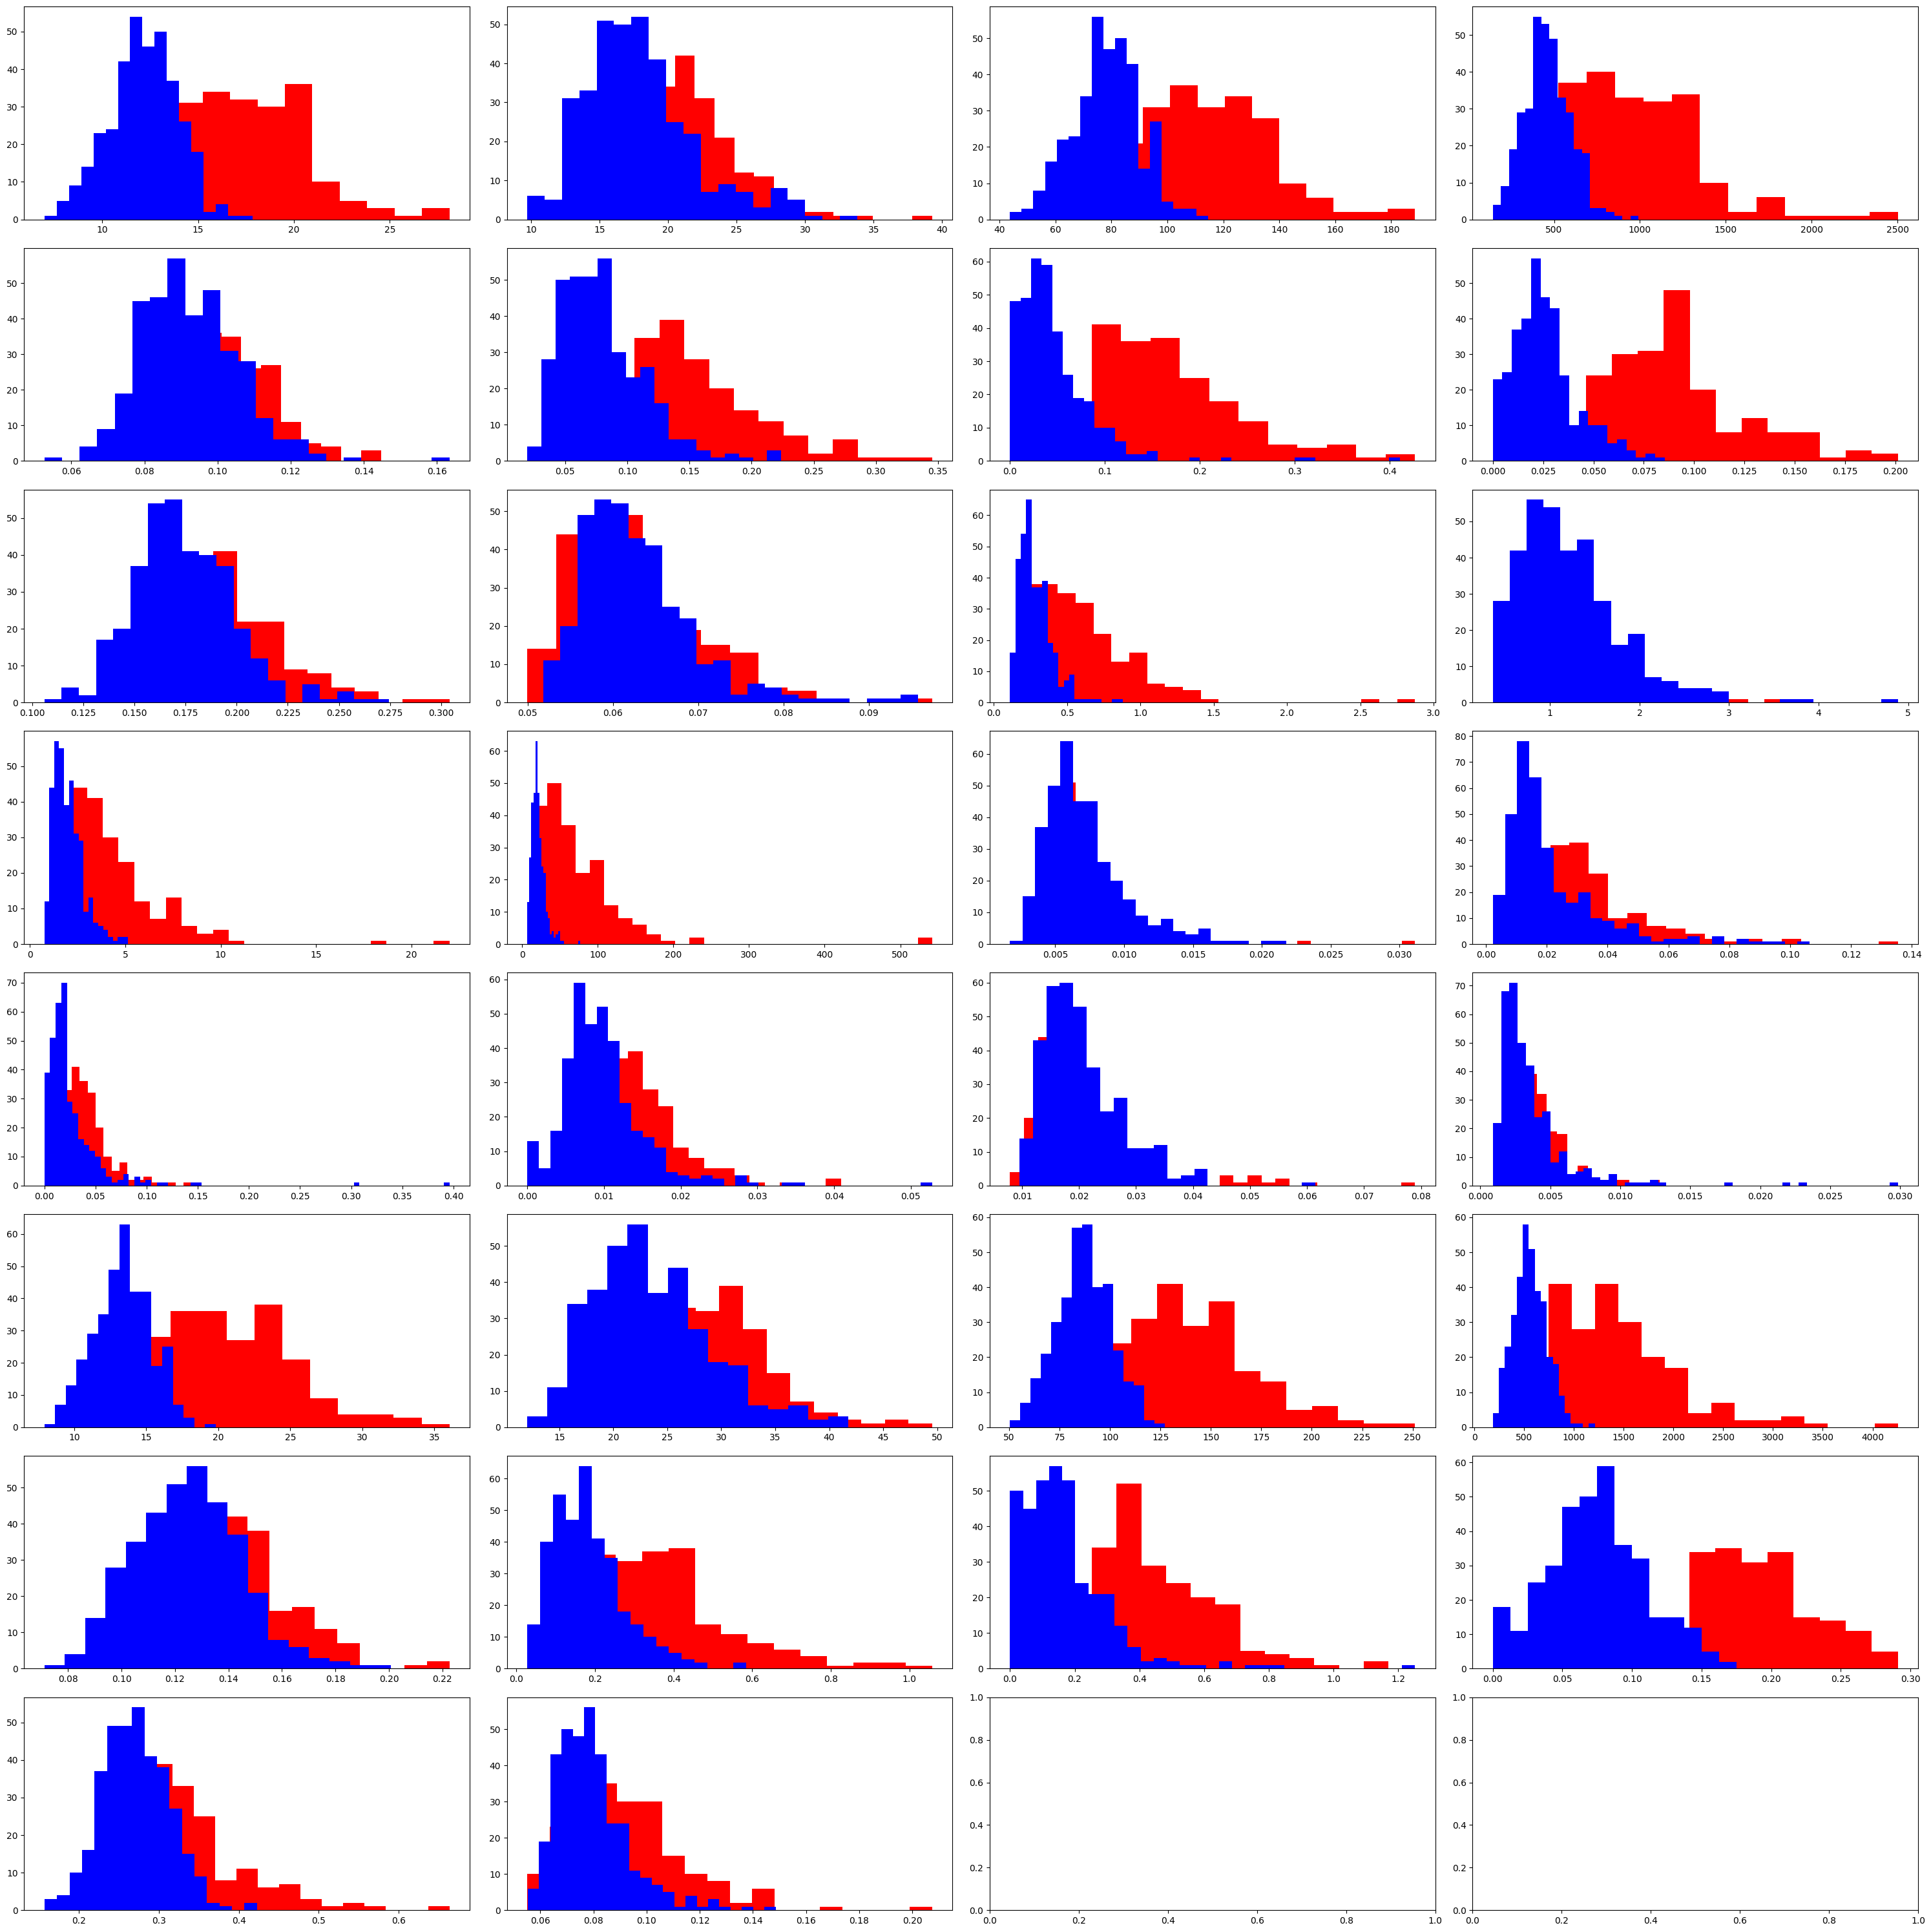

In [12]:
# check normality

num_cols = 4  # Number of columns in the grid
num_rows = 8 # Number of rows in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

axes = axes.flatten()
c=0 
for c1 in M_df_col.columns:
    try:
        axes[c].hist(M_df_col[c1],bins="auto",color ="red")
        axes[c].hist(B_df_col[c1],bins="auto",color ="blue")
        c+=1
    except: IndexError
# blue will be the beneign because it is not as harmfull and red will be the malignant cause you know it is deadly
plt.tight_layout()
plt.show()


In [13]:
# preprosessing: scaling, splitting.
df = df.drop(columns=["id"])
y = df["diagnosis"]
X = df.drop(columns=["diagnosis"])
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [14]:
# set training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

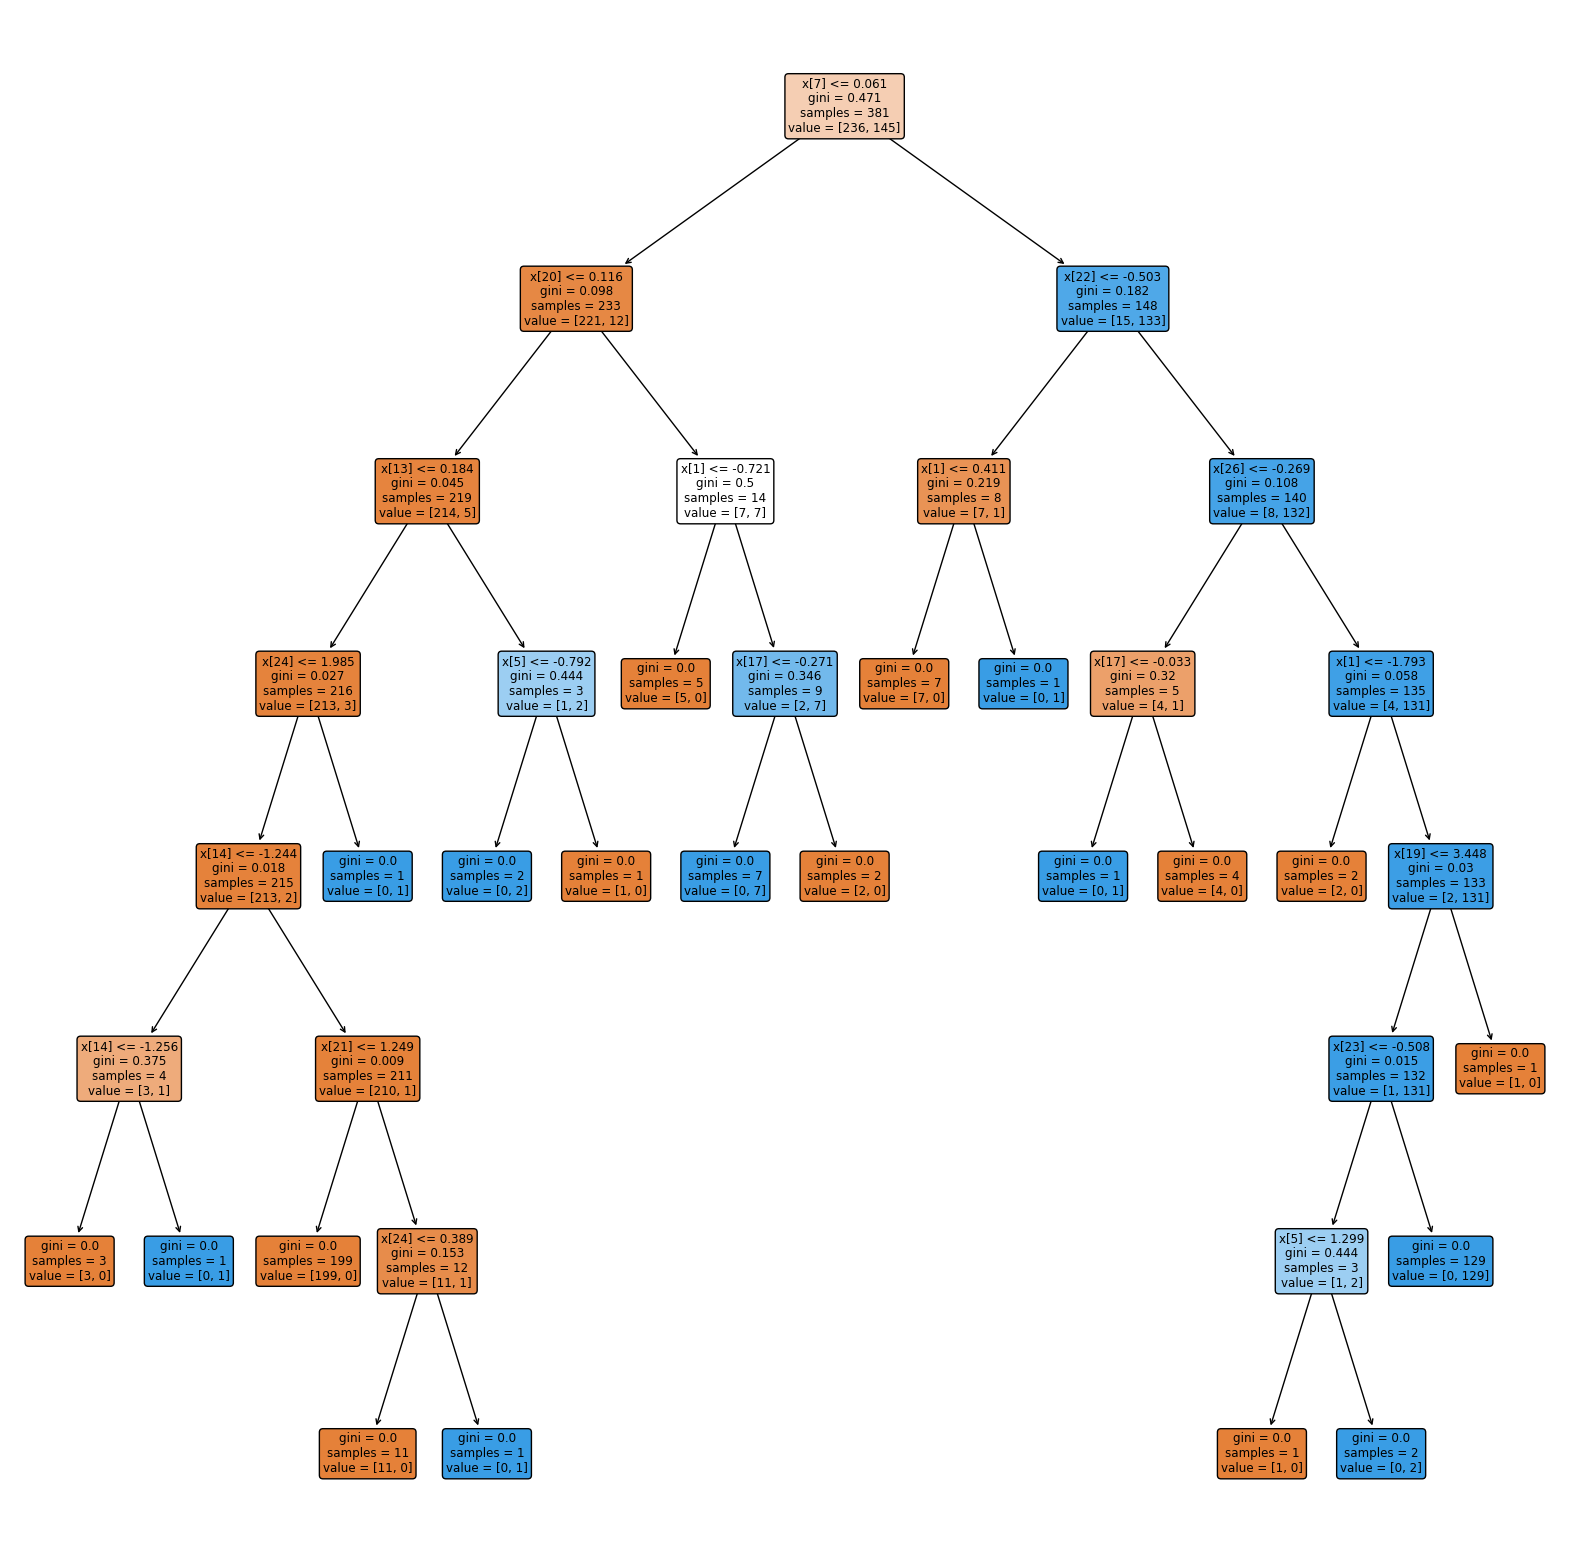

In [17]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
# plot die ding
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt, 
    filled=True,
    rounded=True,
)
plt.show()

In [19]:
# use baiyes stats.
gaus = GaussianNB()
gaus.fit(X_train,y_train)

GaussianNB()

In [21]:
gaus_pred = gaus.predict(X_test)
dt_pred = dt.predict(X_test)
print("logistic regression:")
print(confusion_matrix(gaus_pred,y_test))
print(" ")
print("neigh model:")
print(confusion_matrix(dt_pred,y_test))

logistic regression:
[[115   6]
 [  6  61]]
 
neigh model:
[[108   3]
 [ 13  64]]


In [24]:
gaus_plot = RocCurveDisplay.from_estimator(gaus, X_test, y_test)
plt.close()
dt_plot = RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.close()

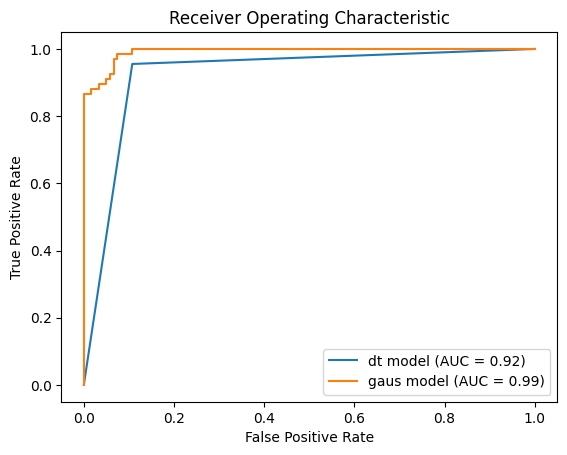

In [25]:
# Plot the ROC curves on the same axis
fig, ax = plt.subplots()
dt_plot.plot(ax=ax, name='dt model')
gaus_plot.plot(ax=ax, name='gaus model')


# Add labels and a legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()

# Display the plot
plt.show()